Let's open a MaNGA DAP FITS file and load it into a DAPAccess object.

In [30]:
from __future__ import (division, print_function, absolute_import, unicode_literals)
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Useful but not required imports
import seaborn as sns
import pandas as pd

# MaNGA DAP imports
from mangadap import dap_access
from mangadap.plot import util
from mangadap.plot import plotdap
# from mangadap.plot import cfg_io

### Specify File Name

In [7]:
# EDIT FILENAME
filename = 'manga-8082-3702-LOGCUBE_BIN-NONE-003.fits'

# Create a dictionary with identifying information about the FITS file
file_kws = util.parse_fits_filename(filename)

### Create directory path to DAP FITS file
#### Option 1: Your directory structure mirrors the Science Archive Server (SAS) [RECOMMENDED].

In [8]:
path_data = os.path.join(os.getenv('MANGA_SPECTRO_ANALYSIS'),
                         os.getenv('MANGADRP_VER'),
                         os.getenv('MANGADAP_VER'),
                         'full',
                         '{plate}'.format(**file_kws),
                         '{ifudesign}'.format(**file_kws))

#### Option 2: Specify the path on your local machine.

In [ ]:
# path_data = 'path/to/data/'

### Create DAPAccess object

In [86]:
from imp import reload
from mangadap import dap_access
reload(dap_access)

<module 'mangadap.dap_access' from '/Users/andrews/manga/mangadap/trunk/python/mangadap/dap_access.py'>

In [89]:
gal = dap_access.DAPAccess(path_data, file_kws)
# gal.get_all_ext()
gal.get_elopar()
gal.get_elofit()

0.09497308731079102

Read manga-8082-3702-LOGCUBE_BIN-NONE-003.fits


In [84]:
gal.fits.hdu[1].data.shape

(1764,)

### Explore DAPAccess

Show emission line flux measurements from Enci Wang's code (first 5 rows of DataFrame):

In [10]:
gal.flux_ew.head()

,OII3727,OII3729,OIId3728,Hb4862,OIII4960,OIII5008,OI6302,OI6365,NII6549,Ha6564,NII6585,SII6718,SII6732,OIIsum
0,3.945313,2.044017,6.129942,2.663977,0.453682,2.022711,0.598785,0.295167,0.837162,7.393376,1.997700,2.324448,1.803635,5.989329
1,4.149444,2.281364,6.623748,2.874567,0.501211,2.011203,0.469477,0.256208,0.736743,7.497330,2.153030,2.282795,1.722582,6.430808
2,2.546117,3.129999,5.928649,2.575207,0.434687,1.922536,0.602685,0.261995,0.729043,7.321875,1.869035,2.301779,1.793199,5.676117
3,3.152176,3.316670,6.665478,2.795853,0.483905,1.932582,0.378297,0.195369,0.615931,7.461363,2.131289,2.192092,1.478974,6.468846
4,2.547319,2.844404,5.629627,2.504241,0.498280,2.075499,0.753843,0.126609,0.726008,7.349393,1.752187,2.334934,1.652687,5.391724


[Description of DAPAccess object](https://trac.sdss.org/wiki/MANGA/TRM/TRM_ActiveDev/dap/DataModel#DAPAccessPythonClass)

## Plotting

### Quick Plot
Make a simple plot from the columns from a DataFrame with [pandas plotting functions](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

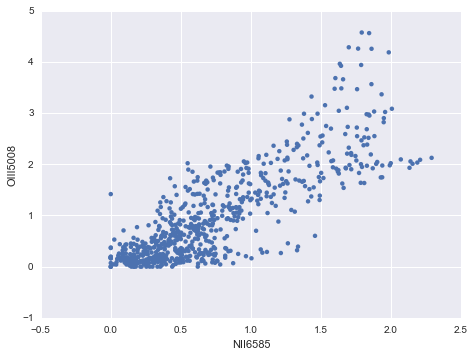

In [11]:
gal.flux_ew.plot(kind='scatter', x='NII6585', y='OIII5008')

In [90]:
mg_kws = copy.deepcopy(file_kws)
mg_kws['mangaid'] = 'N/A'
mg_kws['plateifu'] = '{plate}-{ifudesign}'.format(**mg_kws)
titles=pd.Series(['Ha'], index=['Ha6564'])
cb_kws_master = dict(n_ticks=7)
main = False
make_multi = False
maps_kws = dict(titles=titles, mg_kws=mg_kws, cb_kws_master=cb_kws_master, main=main, make_multi=make_multi)

In [91]:
plotdap.plot_maps(columns=['Ha6564'], values='flux_ew', errors='fluxerr_ew', dapdata=gal, **maps_kws)

AttributeError: 'DAPAccess' object has no attribute 'drps'

In [55]:
gal.elomew.head

AttributeError: 'numpy.ndarray' object has no attribute 'head'